In [31]:
from sys import path
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error as mse, mean_absolute_error, r2_score
import pandas as pd
import numpy as np

# Adding KELMOR.py to the path
path.append("KELMOR.py") # Replace . by the folder that contains KELMOR.py

# Import KELMOR module and class
kelmor_module = __import__("KELMOR") 
KELMOR = kelmor_module.KELMOR

# Load the dataset
DKI1 = pd.read_excel("DATA ISPU - Normalization.xlsx", sheet_name="DKI1")
X = DKI1.index.values.reshape(-1, 1)
y = DKI1['PM10'].values.reshape(-1,)

gamma_value = 0.01
C_value=10


In [32]:
from sklearn.metrics import mean_squared_error as mse, mean_absolute_error, r2_score
mse_scores = []
mae_scores = []
r2_scores = []

# Perform K-Fold Cross Validation
kfold = KFold(n_splits=5, shuffle=True)
mse_scores = []
for train_inds, test_inds in kfold.split(X, y):
    X_train, y_train = X[train_inds, :], y[train_inds]
    X_test, y_test = X[test_inds, :], y[test_inds]
    
    # Train KELMOR on the dataset
    kelmor = KELMOR(C=C_value, kernel="laplacian", gamma=gamma_value)
    kelmor.fit(X_train, y_train)

    # Make predictions
    y_pred = kelmor.predict(X_test)

    # Calculate mean squared error of the predictions
    mse_score = mse(y_test, y_pred)
    mse_scores.append(mse_score)

    # Calculate mean absolute error
    mae_score = mean_absolute_error(y_test, y_pred)
    mae_scores.append(mae_score)

    # Calculate R-squared score
    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)


# Mean of MSE scores from cross validation
mean_mse = np.mean(mse_scores)

# Mean of MAE scores from cross-validation
mean_mae = np.mean(mae_scores)

# Mean of R-squared scores from cross-validation
mean_r2 = np.mean(r2_scores)

# Calculate root mean square error from mean squared error
rmse_score = np.sqrt(mean_mse)

print("\nEvaluation Metrics - Test Data:")
print("RMSE: %.3f" % rmse_score)
print("MSE: %.3f" % mean_mse)
print("MAE: %.3f" % mean_mae)
print("R-squared: %.3f" % mean_r2)

# Make predictions on training data
y_train_pred = kelmor.predict(X_train)

# Calculate mean squared error of the predictions on training data
mse_train = mse(y_train, y_train_pred)

# Calculate mean absolute error on training data
mae_train = mean_absolute_error(y_train, y_train_pred)

# Calculate R-squared score on training data
r2_train = r2_score(y_train, y_train_pred)

# Calculate root mean square error on training data
rmse_train = np.sqrt(mse_train)

print("\nEvaluation Metrics - Training Data:")
print("RMSE: %.3f" % rmse_train)
print("MSE: %.3f" % mse_train)
print("MAE: %.3f" % mae_train)
print("R-squared: %.3f" % r2_train)


Evaluation Metrics - Test Data:
RMSE: 0.117
MSE: 0.014
MAE: 0.088
R-squared: 0.490

Evaluation Metrics - Training Data:
RMSE: 0.089
MSE: 0.008
MAE: 0.066
R-squared: 0.711


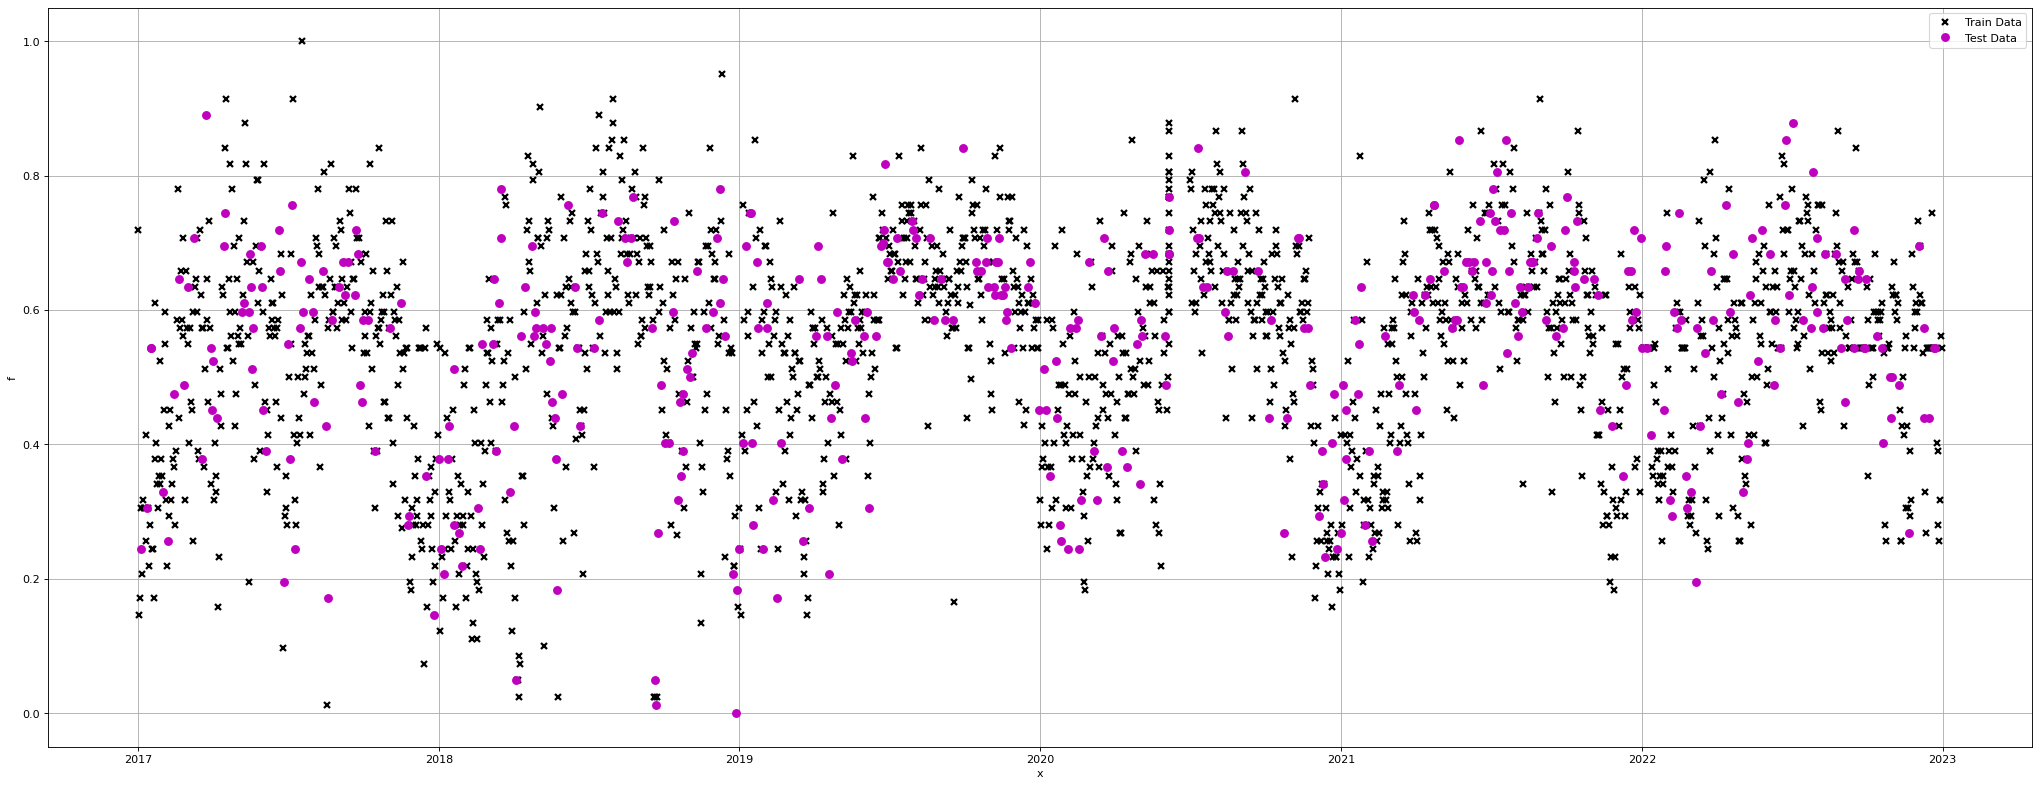

In [33]:
import matplotlib.pyplot as plt
# Plot observations
plt.figure(figsize=(32, 12), dpi=80)
plt.plot(np.array(DKI1['Tanggal'].loc[X_train.flatten()]).reshape(-1,1), y_train, "kx", mew=2, label='Train Data')
plt.plot(np.array(DKI1['Tanggal'].loc[X_test.flatten()]).reshape(-1,1), y_test, "mo", mew=2, label='Test Data')

# Annotate plot
plt.xlabel("x"), plt.ylabel("f")
plt.grid()
plt.legend()

In [34]:
import pandas as pd

# Menggabungkan tanggal, nilai PM10, dan hasil prediksi dalam DataFrame
results = pd.DataFrame({
    'Tanggal': np.array(DKI1['Tanggal'].loc[X_test.flatten()]).reshape(-1, 1).flatten(),
    'PM10': y_test,
    'Prediksi': y_pred.ravel()
})

# Menampilkan tabel hasil prediksi
print(results)

       Tanggal      PM10  Prediksi
0   2017-01-04  0.243902  0.268293
1   2017-01-12  0.304878  0.280488
2   2017-01-16  0.543846  0.268293
3   2017-01-17  0.543846  0.268293
4   2017-01-31  0.329268  0.407317
..         ...       ...       ...
433 2022-12-09  0.573171  0.536585
434 2022-12-10  0.439024  0.500000
435 2022-12-15  0.439024  0.536585
436 2022-12-22  0.543846  0.524390
437 2022-12-23  0.543846  0.500000

[438 rows x 3 columns]


In [35]:
max_value = 100.0
min_value = 0.0
test_Y_denorm = (y_test.flatten() * (max_value - min_value) + min_value)
prediksi_denorm = (y_pred.flatten() * (max_value - min_value) + min_value)
date = np.array(DKI1['Tanggal'].loc[X_test.flatten()]).reshape(-1, 1)

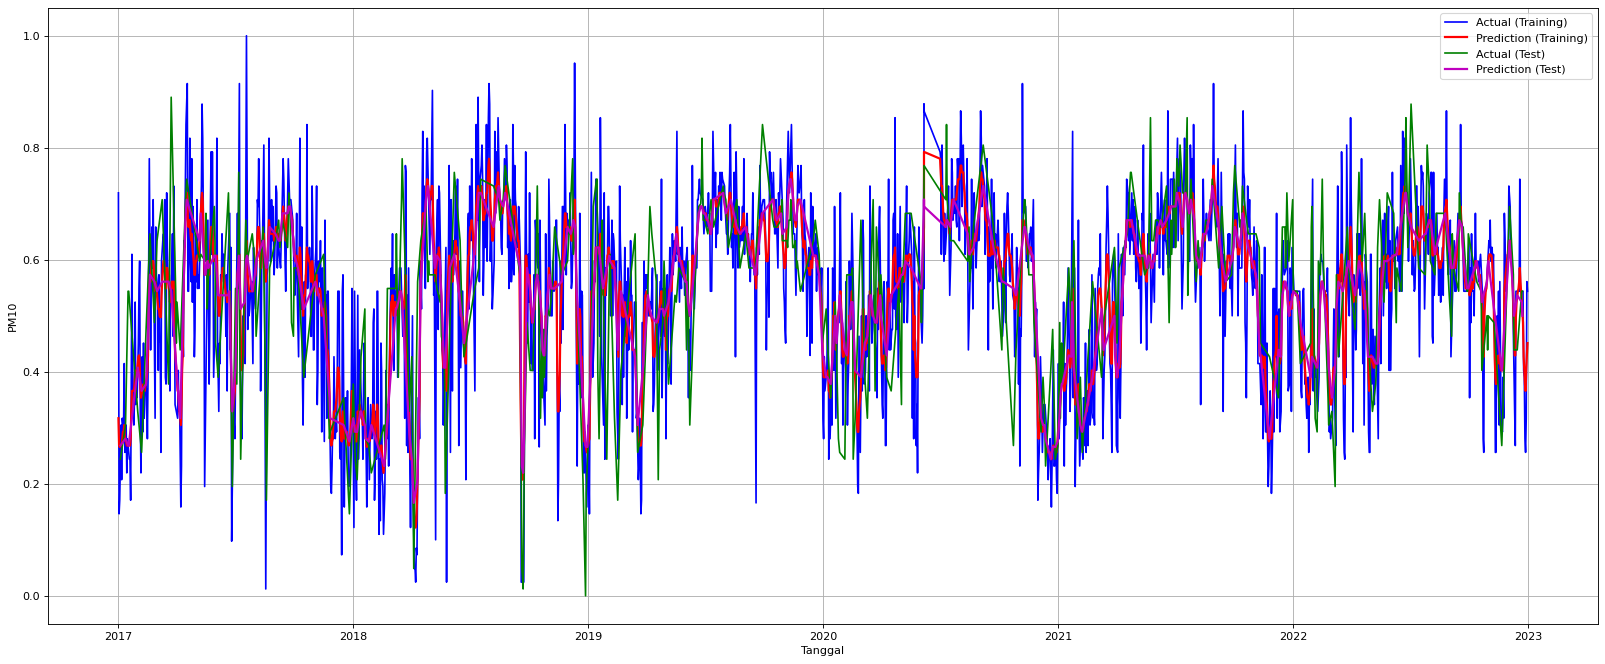

In [36]:
# Plot observations for training data
plt.figure(figsize=(25, 10), dpi=80)
plt.plot(np.array(DKI1['Tanggal'].loc[X_train.flatten()]).reshape(-1, 1), y_train, "b-", label='Actual (Training)')
plt.plot(np.array(DKI1['Tanggal'].loc[X_train.flatten()]).reshape(-1, 1), y_train_pred, "r-", linewidth=2, label='Prediction (Training)')

# Plot observations for test data
plt.plot(np.array(DKI1['Tanggal'].loc[X_test.flatten()]).reshape(-1, 1), y_test, "g-", label='Actual (Test)')
plt.plot(np.array(DKI1['Tanggal'].loc[X_test.flatten()]).reshape(-1, 1), y_pred, "m-", linewidth=2, label='Prediction (Test)')

# Annotate plot
plt.xlabel("Tanggal")
plt.ylabel("PM10")
plt.grid()
plt.legend()
plt.show()


In [37]:
import pandas as pd

# Menggabungkan tanggal, nilai PM10, dan hasil prediksi dari data uji dalam DataFrame
results_test = pd.DataFrame({
    'Tanggal': np.array(DKI1['Tanggal'].loc[X_test.flatten()]).reshape(-1, 1).flatten(),
    'PM10': y_test,
    'Prediksi': y_pred.ravel()
})

# Menggabungkan tanggal, nilai PM10, dan hasil prediksi dari data latih dalam DataFrame
results_train = pd.DataFrame({
    'Tanggal': np.array(DKI1['Tanggal'].loc[X_train.flatten()]).reshape(-1, 1).flatten(),
    'PM10': y_train,
    'Prediksi': y_train_pred.ravel()
})

# Menggabungkan data uji dan data latih berdasarkan tanggal
results = pd.concat([results_train, results_test], ignore_index=True)

# Menampilkan tabel hasil prediksi
print(results)


        Tanggal      PM10  Prediksi
0    2017-01-01  0.719512  0.317073
1    2017-01-02  0.146341  0.268293
2    2017-01-03  0.170732  0.265854
3    2017-01-05  0.304878  0.268293
4    2017-01-06  0.207317  0.268293
...         ...       ...       ...
2186 2022-12-09  0.573171  0.536585
2187 2022-12-10  0.439024  0.500000
2188 2022-12-15  0.439024  0.536585
2189 2022-12-22  0.543846  0.524390
2190 2022-12-23  0.543846  0.500000

[2191 rows x 3 columns]


In [38]:
max_value = 100.0
min_value = 0.0

# Denormalize data uji
test_Y_denorm = (y_test.flatten() * (max_value - min_value) + min_value)
prediksi_denorm = (y_pred.flatten() * (max_value - min_value) + min_value)
date_test = np.array(DKI1['Tanggal'].loc[X_test.flatten()]).reshape(-1, 1)

# Denormalize data latih
y_train_denorm = (y_train.flatten() * (max_value - min_value) + min_value)
y_train_pred_denorm = (y_train_pred.flatten() * (max_value - min_value) + min_value)
date_train = np.array(DKI1['Tanggal'].loc[X_train.flatten()]).reshape(-1, 1)

# Membuat DataFrame untuk hasil prediksi data latih
results_train = pd.DataFrame({
    'Tanggal': date_train.flatten(),
    'PM10': y_train_denorm,
    'Prediksi': y_train_pred_denorm
})

# Membuat DataFrame untuk hasil prediksi data uji
results_test = pd.DataFrame({
    'Tanggal': date_test.flatten(),
    'PM10': test_Y_denorm,
    'Prediksi': prediksi_denorm
})

# Menggabungkan DataFrame data latih dan data uji
results = pd.concat([results_train, results_test], axis=0)

# Menampilkan tabel hasil prediksi
print("Hasil Prediksi:")
print(results)


Hasil Prediksi:
       Tanggal       PM10   Prediksi
0   2017-01-01  71.951220  31.707317
1   2017-01-02  14.634146  26.829268
2   2017-01-03  17.073171  26.585366
3   2017-01-05  30.487805  26.829268
4   2017-01-06  20.731707  26.829268
..         ...        ...        ...
433 2022-12-09  57.317073  53.658537
434 2022-12-10  43.902439  50.000000
435 2022-12-15  43.902439  53.658537
436 2022-12-22  54.384645  52.439024
437 2022-12-23  54.384645  50.000000

[2191 rows x 3 columns]


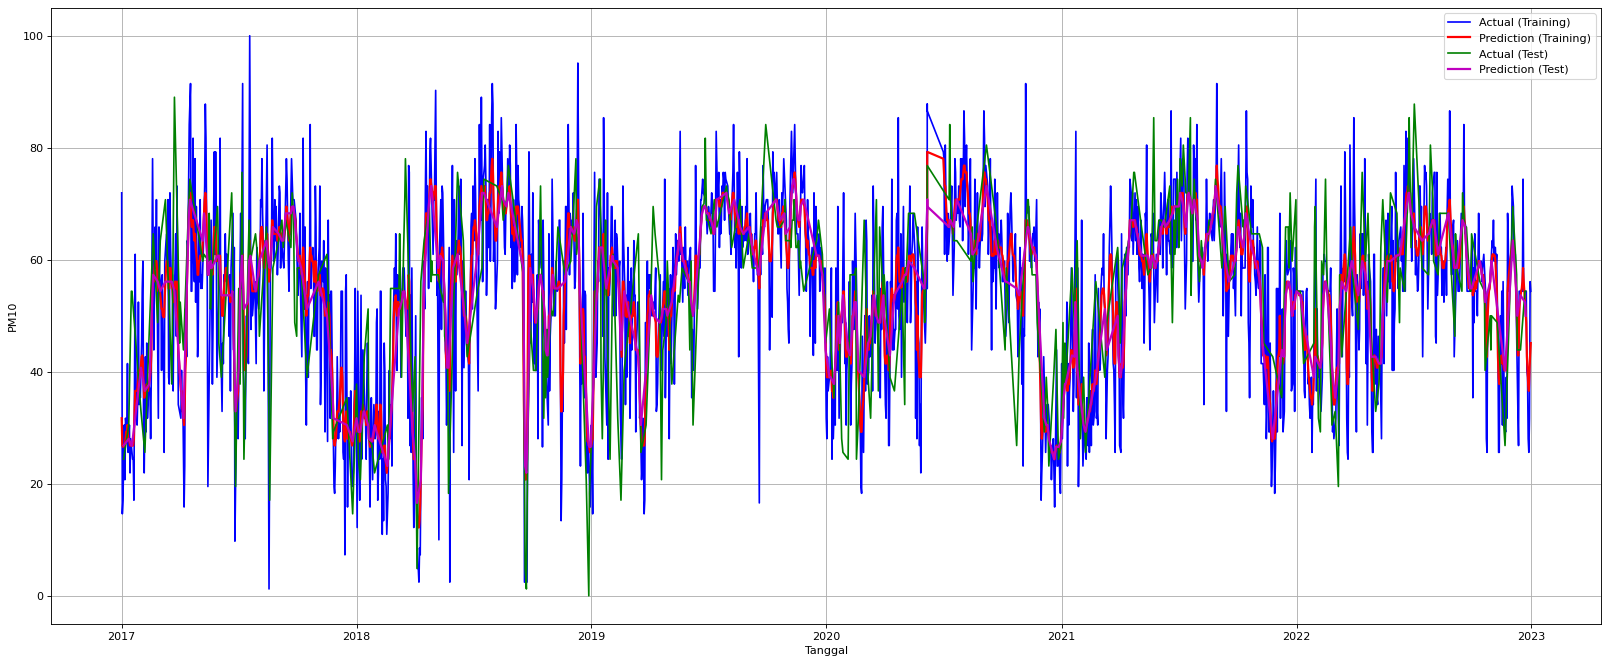

In [39]:
max_value = 100.0
min_value = 0.0

# Denormalize training data
y_train_denorm = (y_train.flatten() * (max_value - min_value) + min_value)
y_train_pred_denorm = (y_train_pred.flatten() * (max_value - min_value) + min_value)
date_train = np.array(DKI1['Tanggal'].loc[X_train.flatten()]).reshape(-1, 1)

# Denormalize test data
y_test_denorm = (y_test.flatten() * (max_value - min_value) + min_value)
y_pred_denorm = (y_pred.flatten() * (max_value - min_value) + min_value)
date_test = np.array(DKI1['Tanggal'].loc[X_test.flatten()]).reshape(-1, 1)

# Plot observations for training data
plt.figure(figsize=(25, 10), dpi=80)
plt.plot(date_train, y_train_denorm, "b-", label='Actual (Training)')
plt.plot(date_train, y_train_pred_denorm, "r-", linewidth=2, label='Prediction (Training)')

# Plot observations for test data
plt.plot(date_test, y_test_denorm, "g-", label='Actual (Test)')
plt.plot(date_test, y_pred_denorm, "m-", linewidth=2, label='Prediction (Test)')

# Annotate plot
plt.xlabel("Tanggal")
plt.ylabel("PM10")
plt.grid()
plt.legend()
plt.show()
